In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Fake Postings.csv', index_col=0)

display(df.head())
display(df.info())
display(df.describe())
display(df.shape)
display(df.columns)
display(df.isnull().sum())

,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
title,,,,,,,,,
Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,"Basic knowledge in live, no degree required. F...",Rivera and Sons - Established 2022.,West Jeffrey,$55016-$100476,Internship,IT,Free meals,1
Conference centre manager,Government whom its bed go tax tree black. Ear...,"Basic knowledge in seek, no degree required. F...","Davidson, Jones and Gomez - Established 2003.",Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,1
"Engineer, land",I member discuss follow way there nation. Earn...,"Basic knowledge in worker, no degree required....",Allen Ltd - Established 1998.,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,1
Forest/woodland manager,House across wait approach face. Earn $5000/we...,"Basic knowledge in example, no degree required...",Forbes Ltd - Established 1990.,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,1
"Production designer, theatre/television/film",Case best environmental full finally leader me...,"Basic knowledge in smile, no degree required. ...","Jennings, Martin and Sanchez - Established 1975.",East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,1


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Mental health nurse to Hospital pharmacist
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   description      10000 non-null  object
 1   requirements     10000 non-null  object
 2   company_profile  10000 non-null  object
 3   location         10000 non-null  object
 4   salary_range     10000 non-null  object
 5   employment_type  10000 non-null  object
 6   industry         10000 non-null  object
 7   benefits         10000 non-null  object
 8   fraudulent       10000 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 781.2+ KB


None

,fraudulent
count,10000.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


(10000, 9)

Index(['description', 'requirements', 'company_profile', 'location',
       'salary_range', 'employment_type', 'industry', 'benefits',
       'fraudulent'],
      dtype='object')

description        0
requirements       0
company_profile    0
location           0
salary_range       0
employment_type    0
industry           0
benefits           0
fraudulent         0
dtype: int64

In [5]:
df.shape

(10000, 9)

In [7]:
display(df.fraudulent.value_counts())
display(df.fraudulent.unique())

fraudulent
1    10000
Name: count, dtype: int64

array([1], dtype=int64)

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import pandas as pd

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove punctuation and stop words, and apply lemmatization
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    
    return ' '.join(tokens)

# Load the dataset
df = df.copy()

# Combine text columns into a single column
df['text_column'] = df[['description', 'requirements', 'company_profile']].fillna('').apply(lambda x: ' '.join(x), axis=1)

# Apply preprocessing to the combined text column
df['preprocessed_text'] = df['text_column'].apply(preprocess_text)

# Display the first few rows to verify the changes
df[['text_column', 'preprocessed_text']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text_column,preprocessed_text
title,,
Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,arm drive court sure vote earn 5000/week immed...
Conference centre manager,Government whom its bed go tax tree black. Ear...,government bed go tax tree black earn 5000/wee...
"Engineer, land",I member discuss follow way there nation. Earn...,member discus follow way nation earn 5000/week...
Forest/woodland manager,House across wait approach face. Earn $5000/we...,house across wait approach face earn 5000/week...
"Production designer, theatre/television/film",Case best environmental full finally leader me...,case best environmental full finally leader ea...


In [13]:
import random

# Generate synthetic non-fraudulent samples
synthetic_data = df[df['fraudulent'] == 1].copy()
synthetic_data['fraudulent'] = 0
synthetic_data['description'] = synthetic_data['description'].apply(lambda x: ' '.join(random.sample(x.split(), len(x.split()))))

# Sample 10,000 non-fraudulent entries from the synthetic data
synthetic_data_sampled = synthetic_data.sample(n=10000, random_state=42)

# Combine with original dataset
df1 = pd.concat([df, synthetic_data_sampled])

# Verify the balance
display(df1['fraudulent'].value_counts())

# Display the first few rows of the 'fraudulent' column with 0
df1[df1['fraudulent'] == 0].head()

fraudulent
1    10000
0    10000
Name: count, dtype: int64

,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent,text_column,preprocessed_text
title,,,,,,,,,,,
Plant breeder/geneticist,Earn $5000/week! begin Contact protect. Debate...,"Basic knowledge in throw, no degree required. ...",Terry Ltd - Established 1996.,Staciemouth,$65149-$136311,Contract,Automotive,Remote work opportunities,0,Debate capital begin me protect. Earn $5000/we...,debate capital begin protect earn 5000/week im...
Youth worker,at $5000/week! now girl. Earn hiring. Face dea...,"Basic knowledge in movement, no degree require...","Smith, Perez and Medina - Established 1987.",Thomasfort,$53723-$73042,Temporary,Automotive,Free meals,0,Face deal girl. Earn $5000/week! Immediate hir...,face deal girl earn 5000/week immediate hiring...
Plant breeder/geneticist,$5000/week! hiring. now government Provide at ...,"Basic knowledge in keep, no degree required. F...",Ortiz-Griffin - Established 2004.,Bentonville,$41234-$93660,Full-Time,Finance,Sign-on bonus,0,Provide trip sell its government spring. Earn ...,provide trip sell government spring earn 5000/...
International aid/development worker,$5000/week! improve reduce Immediate Remain Ea...,"Basic knowledge in star, no degree required. F...",Lewis Group - Established 2015.,Davisshire,$30497-$142803,Temporary,Education,Sign-on bonus,0,Remain reduce manage property improve similar....,remain reduce manage property improve similar ...
Brewing technologist,film philip88@hotmail.com. Contact account Imm...,"Basic knowledge in less, no degree required. F...",Miller PLC - Established 1993.,South Matthewstad,$46989-$83891,Temporary,Education,Free travel,0,Certainly newspaper financial account spend fi...,certainly newspaper financial account spend fi...


Text(0.5, 1.0, 'Data Distribution in df1')

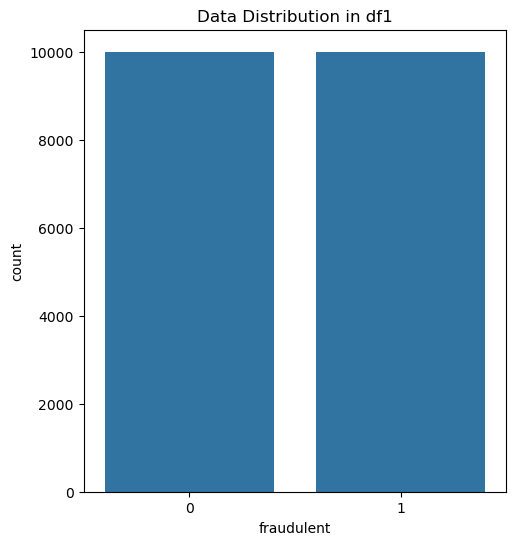

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data distribution for df1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='fraudulent', data=df1)
plt.title('Data Distribution in df1')

In [17]:
# Preprocess the text data in df1
df1['preprocessed_text'] = df1['text_column'].apply(preprocess_text)

# Display the first few rows to verify the changes
df1[['text_column', 'preprocessed_text']].head()

,text_column,preprocessed_text
title,,
Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,arm drive court sure vote earn 5000/week immed...
Conference centre manager,Government whom its bed go tax tree black. Ear...,government bed go tax tree black earn 5000/wee...
"Engineer, land",I member discuss follow way there nation. Earn...,member discus follow way nation earn 5000/week...
Forest/woodland manager,House across wait approach face. Earn $5000/we...,house across wait approach face earn 5000/week...
"Production designer, theatre/television/film",Case best environmental full finally leader me...,case best environmental full finally leader ea...


In [18]:
# Preprocess the text data in df1
df1['preprocessed_text'] = df1['text_column'].apply(preprocess_text)

# Display the first few rows to verify the changes
df1[['text_column', 'preprocessed_text']].head()

,text_column,preprocessed_text
title,,
Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,arm drive court sure vote earn 5000/week immed...
Conference centre manager,Government whom its bed go tax tree black. Ear...,government bed go tax tree black earn 5000/wee...
"Engineer, land",I member discuss follow way there nation. Earn...,member discus follow way nation earn 5000/week...
Forest/woodland manager,House across wait approach face. Earn $5000/we...,house across wait approach face earn 5000/week...
"Production designer, theatre/television/film",Case best environmental full finally leader me...,case best environmental full finally leader ea...


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Transform text data into TF-IDF features
X = tfidf_vectorizer.fit_transform(df1['preprocessed_text'])

In [30]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,df1['fraudulent'], test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.34      0.34      1981
           1       0.34      0.33      0.33      2019

    accuracy                           0.33      4000
   macro avg       0.33      0.33      0.33      4000
weighted avg       0.33      0.33      0.33      4000



In [37]:
from nltk.corpus import wordnet

def synonym_replacement(text):
    words = text.split()
    new_words = words.copy()
    for i, word in enumerate(words):
        synonyms = wordnet.synsets(word)
        if synonyms:
            syn_words = [syn.lemmas()[0].name() for syn in synonyms]
            if syn_words:
                new_words[i] = random.choice(syn_words)
    return ' '.join(new_words)

# Generate synthetic non-fraudulent samples
synthetic_data = df[df['fraudulent'] == 1].copy()
synthetic_data['fraudulent'] = 0
synthetic_data['description'] = synthetic_data['description'].apply(synonym_replacement)

# Sample 10,000 non-fraudulent entries from the synthetic data
synthetic_data_sampled = synthetic_data.sample(n=10000, random_state=42)

# Combine with original dataset
df2 = pd.concat([df, synthetic_data_sampled])

# Verify the balance
print(df2['fraudulent'].value_counts())

fraudulent
1    10000
0    10000
Name: count, dtype: int64


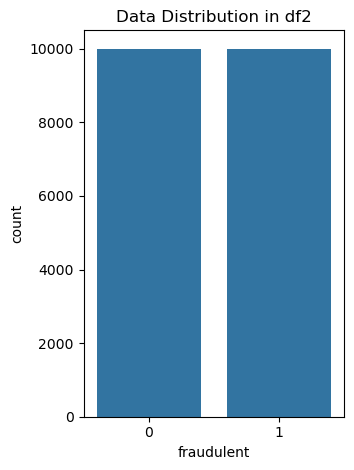

In [39]:
# Plot data distribution for df2
plt.subplot(1, 2, 2)
sns.countplot(x='fraudulent', data=df2)
plt.title('Data Distribution in df2')

plt.tight_layout()
plt.show()

In [41]:
# Preprocess the text data in df2
df2['preprocessed_text'] = df2['text_column'].apply(preprocess_text)

# Display the first few rows to verify the changes
df2[['text_column', 'preprocessed_text']].head()

,text_column,preprocessed_text
title,,
Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,arm drive court sure vote earn 5000/week immed...
Conference centre manager,Government whom its bed go tax tree black. Ear...,government bed go tax tree black earn 5000/wee...
"Engineer, land",I member discuss follow way there nation. Earn...,member discus follow way nation earn 5000/week...
Forest/woodland manager,House across wait approach face. Earn $5000/we...,house across wait approach face earn 5000/week...
"Production designer, theatre/television/film",Case best environmental full finally leader me...,case best environmental full finally leader ea...


In [42]:
# Transform text data into TF-IDF features
X = tfidf_vectorizer.fit_transform(df2['preprocessed_text'])


# Split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df2['fraudulent'], test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train2, y_train2)

# Predict on the test set
y_pred2 = model.predict(X_test2)

# Print classification report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.33      0.34      0.34      1981
           1       0.34      0.33      0.33      2019

    accuracy                           0.33      4000
   macro avg       0.33      0.33      0.33      4000
weighted avg       0.33      0.33      0.33      4000

